**Задание 1**
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [21]:
boston = load_boston()

In [22]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['price'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler.

In [24]:
scaler = StandardScaler()

In [25]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [26]:
tsn = TSNE(n_components=2, learning_rate=250, random_state=42)

In [27]:
X_train_tsne = tsn.fit_transform(X_train_scaled)

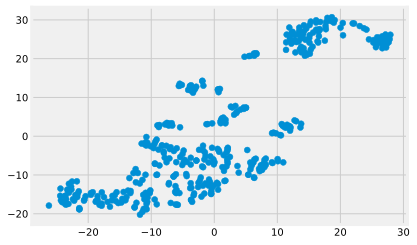

In [28]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

**Задание 2**
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [29]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [39]:
X_train_kmeans = kmeans.fit_predict(X_train)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

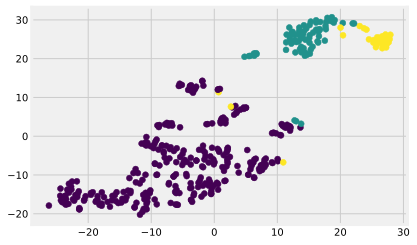

In [40]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = X_train_kmeans)

Вычислите средние значения price и CRIM в разных кластерах.

In [48]:
X_train.loc[X_train_kmeans == 0, 'CRIM'].mean(), X_train.loc[X_train_kmeans == 1, 'CRIM'].mean(), X_train.loc[X_train_kmeans == 2, 'CRIM'].mean()

(0.40486282828282844, 11.745661842105266, 14.360380322580648)

In [52]:
y_train.loc[X_train_kmeans == 0, 'price'].mean(), y_train.loc[X_train_kmeans == 1, 'price'].mean(), y_train.loc[X_train_kmeans == 2, 'price'].mean() 

(25.168686868686873, 17.4421052631579, 13.196774193548386)

**Задание 3**
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [56]:
X_test_kmeans = kmeans.fit_predict(X_test)

In [59]:
X_test.loc[X_test_kmeans == 0, 'CRIM'].mean(), X_test.loc[X_test_kmeans == 1, 'CRIM'].mean(), X_test.loc[X_test_kmeans == 2, 'CRIM'].mean()

(0.2464211594202899, 8.469301923076923, 19.021665714285714)

In [60]:
y_test.loc[X_test_kmeans == 0, 'price'].mean(), y_test.loc[X_test_kmeans == 1, 'price'].mean(), y_test.loc[X_test_kmeans == 2, 'price'].mean()

(23.911594202898552, 17.39230769230769, 12.814285714285713)

In [61]:
X_test_tsne = tsn.fit_transform(X_test_scaled)

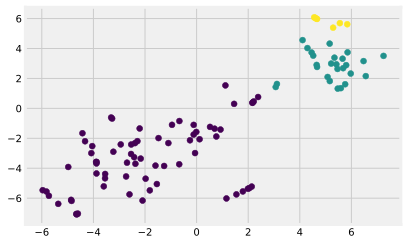

In [62]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c = X_test_kmeans)